In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dateutil.parser import parse

In [2]:
archivo = "../data/enerhabitat-2025-10-20.csv"
epw = pd.read_csv(archivo,
                 index_col=0,
                 parse_dates=True,
                 usecols = ['Time', 'Tsa_1'])
epw

,Tsa_1
Time,
2025-05-15 00:00:00-06:00,25.5
2025-05-15 00:01:00-06:00,25.4
2025-05-15 00:02:00-06:00,25.4
2025-05-15 00:03:00-06:00,25.4
2025-05-15 00:04:00-06:00,25.4
...,...
2025-05-15 23:55:00-06:00,25.6
2025-05-15 23:56:00-06:00,25.5
2025-05-15 23:57:00-06:00,25.5


In [3]:
epw['P'] = 100_000
epw['Ig'] = 0
epw['Ib'] = 0
epw['HR'] = 23
epw['Ig'] = 0
epw['WS'] = 0
epw['WD'] = 0

epw.rename(columns = {'Tsa_1' : 'Tsa'}, inplace = True)

In [4]:
epw

,Tsa,P,Ig,Ib,HR,WS,WD
Time,,,,,,,
2025-05-15 00:00:00-06:00,25.5,100000,0,0,23,0,0
2025-05-15 00:01:00-06:00,25.4,100000,0,0,23,0,0
2025-05-15 00:02:00-06:00,25.4,100000,0,0,23,0,0
2025-05-15 00:03:00-06:00,25.4,100000,0,0,23,0,0
2025-05-15 00:04:00-06:00,25.4,100000,0,0,23,0,0
...,...,...,...,...,...,...,...
2025-05-15 23:55:00-06:00,25.6,100000,0,0,23,0,0
2025-05-15 23:56:00-06:00,25.5,100000,0,0,23,0,0
2025-05-15 23:57:00-06:00,25.5,100000,0,0,23,0,0


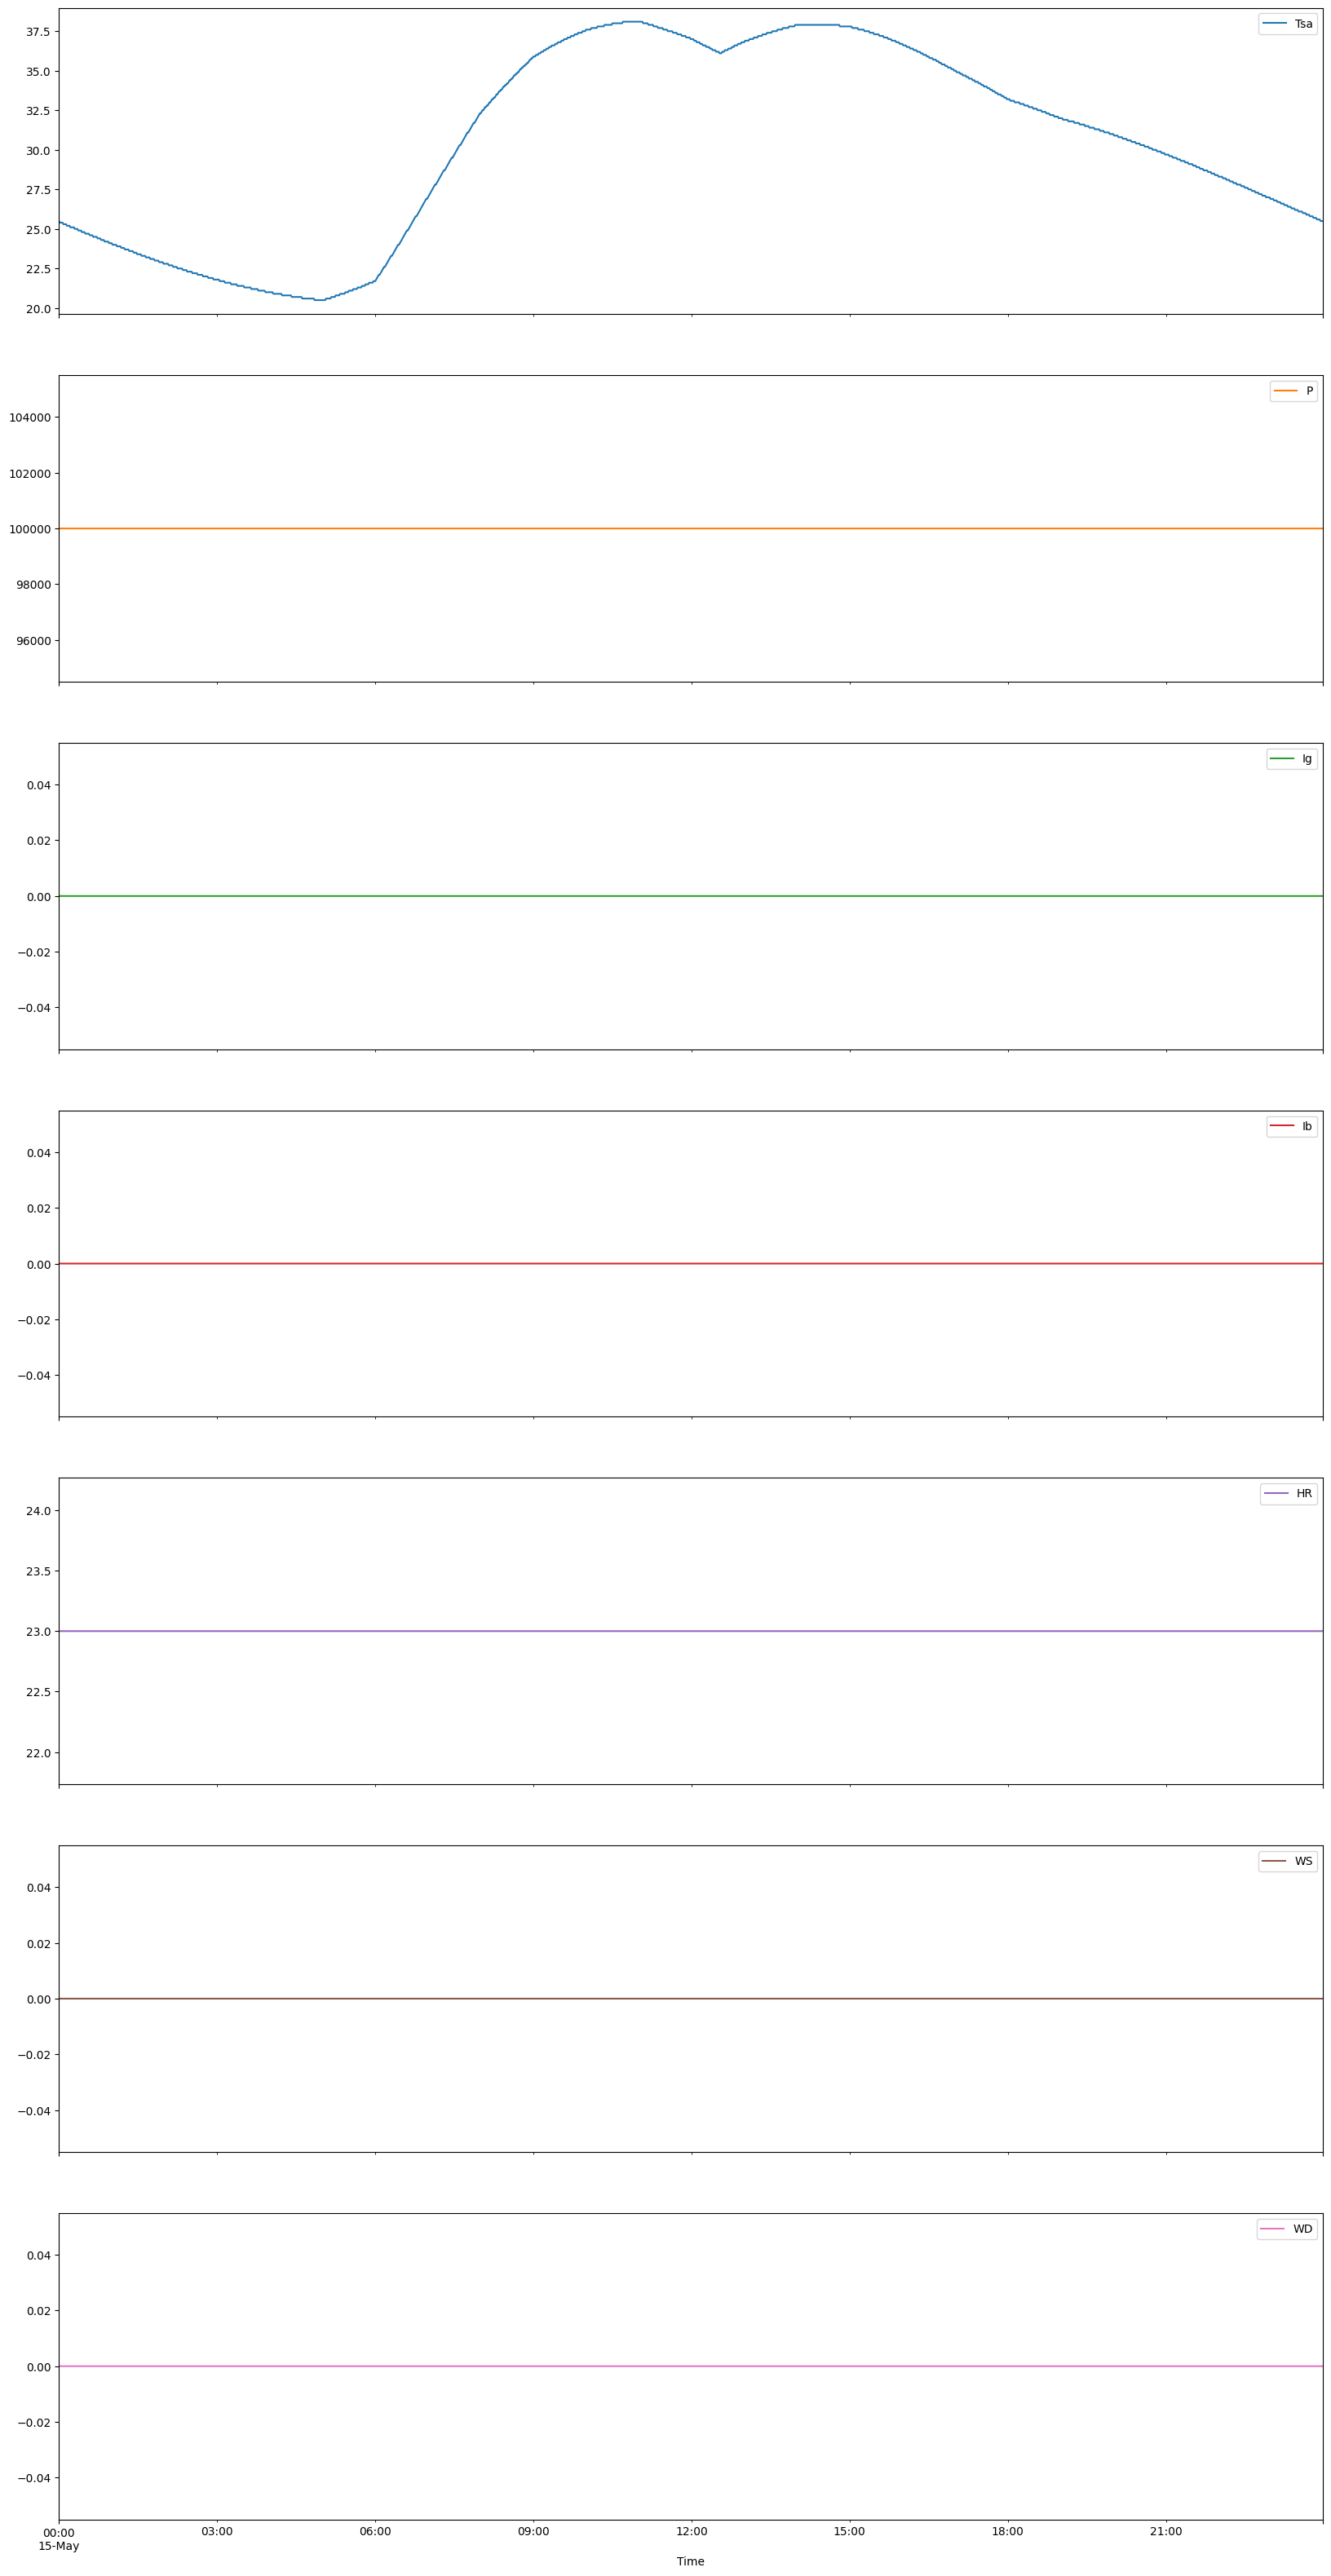

In [5]:
epw.plot(subplots=True,figsize=(20,40));

In [6]:
def df2epw(df):
    df['anio']    = df.index.year
    df['mes']     = df.index.month
    df['dia']     = df.index.day
    df['hora']    = df.index.hour
    df['minutos'] = df.index.minute
    return df[0:]

In [9]:

columnas = ['anio','mes','dia','hora','minutos',
            'Tsa','HR','P',"Ig","Ib",'WD','WS']
tmp = df2epw(epw)

tmp.to_csv( "../epw/Tsa_Temixco_mayo_este-a0p3.csv",
           columns=columnas,header=False,index=False)
#tmp.to_csv( "../epw/Temixco_2018.csv",
 #          columns=columnas,header=False,index=False)


In [ ]:
tmp